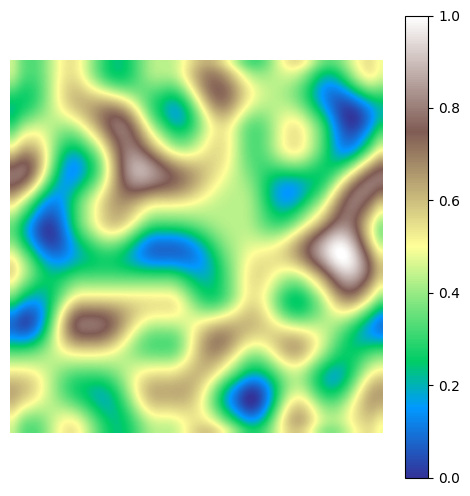

In [1]:
import time
from utils import perlin_noise, a_stern, dijkstra, draw_path
import numpy as np
import matplotlib.pyplot as plt

# Parameter
dim = 50
scale = 5
seed = 0
noise = perlin_noise(dim, dim, scale, seed=seed)
noise-=np.min(noise)
noise/= np.max(noise)

# Visualisierung
plt.figure(figsize=(6, 6))
plt.imshow(noise, cmap='terrain', interpolation='lanczos')
plt.axis('off')
plt.colorbar()
plt.show()

[25, 25] [45 45]
Rechenzeit (in s): 1.683056354522705


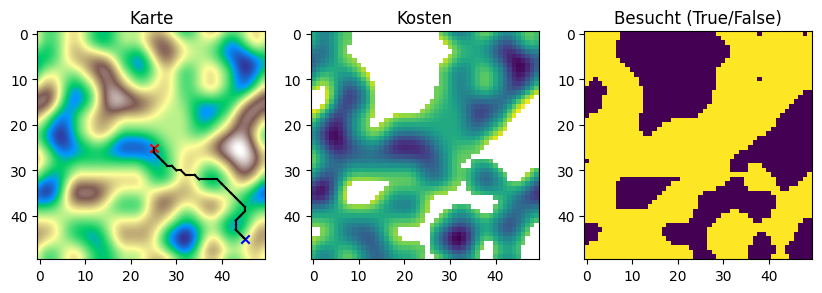

In [2]:
np.random.seed(1)
#start = np.random.randint(0,dim, (2,))
#ziel = np.random.randint(0,dim, (2,))
start = np.array([dim//10,dim//10])
ziel = dim-np.array([dim//10,dim//10])

start = [dim//2,dim//2]
print(start, ziel)

distmat = np.linalg.norm(np.stack(np.meshgrid(np.arange(0,dim), np.arange(0,dim))).transpose(2,1,0)-ziel, axis=-1)
heuristik = np.log(distmat+1e-8)+1
distmat /= distmat[start[0], start[1]]
heuristik = distmat

t_start = time.time()
pfad, costmat, besucht = dijkstra(noise, start, ziel, heuristik)
#pfad, costmat, besucht = a_stern(noise, start, ziel, heuristik)
print("Rechenzeit (in s):",time.time()-t_start)

plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
plt.imshow(noise, cmap="terrain", interpolation="lanczos")
plt.scatter(start[1], start[0], marker="x", c="red")
plt.scatter(ziel[1], ziel[0], marker="x", c="blue")
draw_path(pfad)
plt.title("Karte")
plt.subplot(1,3,2)
plt.imshow(costmat)
plt.title("Kosten")
plt.subplot(1,3,3)
plt.imshow(besucht)
plt.title("Besucht (True/False)")
plt.show()

[25, 25] [45 45]
Rechenzeit (in s): 0.21881794929504395


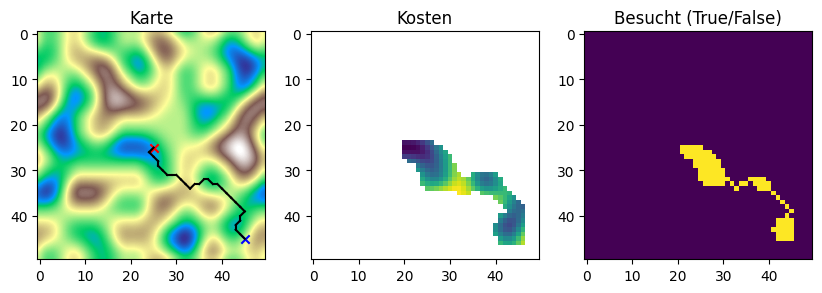

In [3]:
np.random.seed(1)
#start = np.random.randint(0,dim, (2,))
#ziel = np.random.randint(0,dim, (2,))
start = np.array([dim//10,dim//10])
ziel = dim-np.array([dim//10,dim//10])

start = [dim//2,dim//2]
print(start, ziel)

distmat = np.linalg.norm(np.stack(np.meshgrid(np.arange(0,dim), np.arange(0,dim))).transpose(2,1,0)-ziel, axis=-1)
#distmat = np.abs(np.stack(np.meshgrid(np.arange(0,dim), np.arange(0,dim))).transpose(2,1,0)-ziel).sum(axis=-1).astype(np.float32)
# infinity norm distmat
#distmat = np.max(np.abs(np.stack(np.meshgrid(np.arange(0,dim), np.arange(0,dim))).transpose(2,1,0)-ziel), axis=-1).astype(np.float32)
#heuristik = np.log(distmat+1e-8)*0.5
distmat /= distmat[start[0], start[1]]
heuristik = distmat

t_start = time.time()
#pfad, costmat, besucht = dijkstra(noise, start, ziel, heuristik)
pfad, costmat, besucht = a_stern(noise, start, ziel, heuristik)
print("Rechenzeit (in s):",time.time()-t_start)

plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
plt.imshow(noise, cmap="terrain", interpolation="lanczos")
plt.scatter(start[1], start[0], marker="x", c="red")
plt.scatter(ziel[1], ziel[0], marker="x", c="blue")
draw_path(pfad)
plt.title("Karte")
plt.subplot(1,3,2)
plt.imshow(costmat)
plt.title("Kosten")
plt.subplot(1,3,3)
plt.imshow(besucht)
plt.title("Besucht (True/False)")
plt.show()